In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
ds=pd.read_csv("D:\diabetes.csv")

In [3]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
ds['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
x=ds['Outcome']
y=ds.drop(['Outcome'],axis=1)

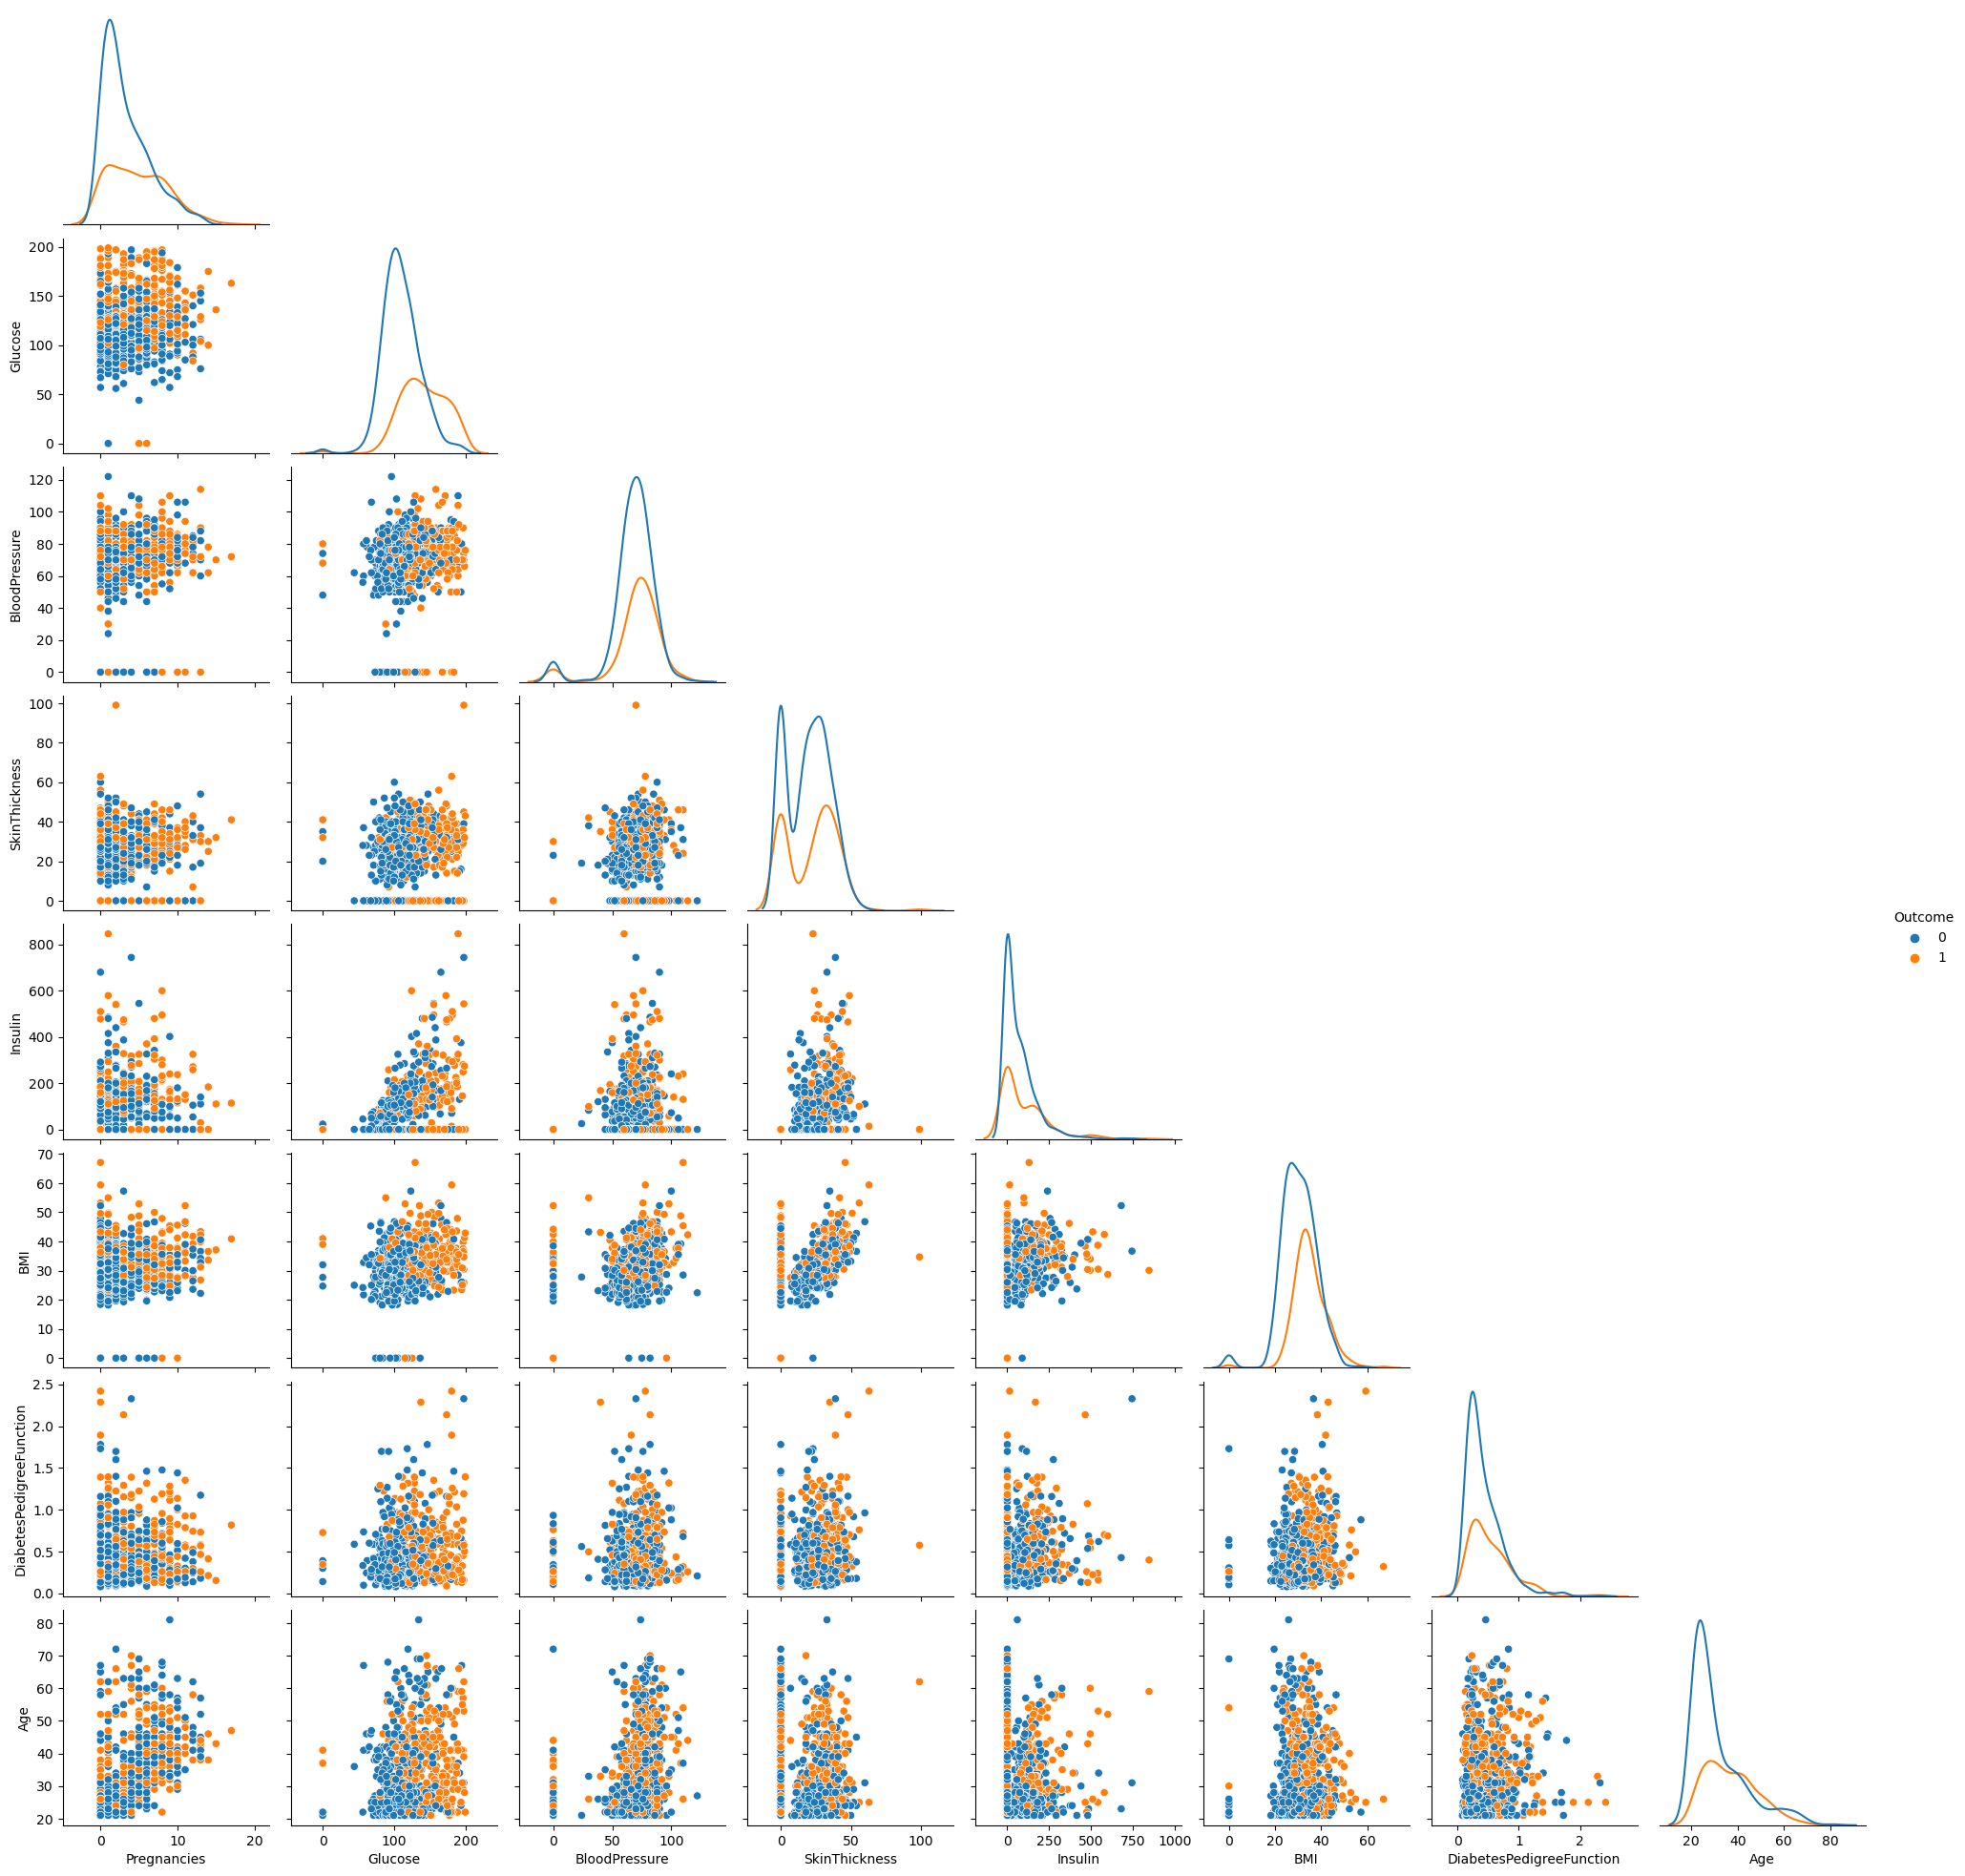

In [7]:
sns.pairplot(ds,hue='Outcome',diag_kws=dict(fill=False),corner=True)

In [8]:
ds.groupby(['Outcome']).mean().T

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [9]:
test_data=ds.tail(100)

In [10]:
x

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
y

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
x.shape

(768,)

In [13]:
y.shape

(768, 8)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614,), (154,), (614, 8), (154, 8))

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(y_train,x_train)

C:\Users\HEMALA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_lg=lg.predict(y_test)
y_lg

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
a=accuracy_score(x_test,y_lg)*100
a

82.46753246753246

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def metrics(actual,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actual,predictions)))     #format output upto 5 decimal values
    print("Precision:{:.5f}".format(precision_score(actual,predictions)))
    print("Recall:{:.5f}".format(recall_score(actual,predictions)))
    print("F1 score:{:.5f}".format(f1_score(actual,predictions)))

In [26]:
metrics(x_test,y_lg.round())

Accuracy:0.82468
Precision:0.76316
Recall:0.61702
F1 score:0.68235


In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()

In [28]:
decision_tree.fit(y_train,x_train)
prediction_dt=decision_tree.predict(y_test)
decision_tree_score=decision_tree.score(y_test,x_test)*100

In [29]:
decision_tree_score

79.22077922077922

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

In [31]:
rf.fit(y_train,x_train)

RandomForestClassifier()

In [32]:
prediction_rf=rf.predict(y_test)
rf_score=rf.score(y_test,x_test)*100
rf_score

82.46753246753246